In [11]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import sys

In [4]:
from tkinter import *
from PIL import Image,ImageTk
from pdf2image import convert_from_path

In [93]:
import os

In [94]:
import image_slicer

In [95]:
county = "BARINGO"
processeddir = f"PROCESSED/{county}/"

In [96]:
len(files)

1032

In [110]:
for file in files[:10]:
    pdftoread = f"{county}/{file}"
    filename = file.split(".")[-2]
    images = convert_from_path(pdftoread)[0]
    mainimagename = f"{processeddir}{filename}.jpg"
    images.save(mainimagename, 'JPEG')
    t = image_slicer.slice(mainimagename,6)
    
    tallyfinal  =  f'{mainimagename.split(".")[-2]}_01_03.png'
    in_file = tallyfinal
    out_file = f'{mainimagename.split(".")[-2]}.png'
    img = Image.open(in_file)
    width, height = img.size
    cropped = img.crop((0, int(height/3), width, height))
    cropped.save(out_file)
    alltorm = [f"{processeddir}{a}" for a in os.listdir(processeddir) if f"{processeddir}{a}".startswith(f'{mainimagename.split(".")[-2]}')]
    [os.remove(a) for a in alltorm if a != out_file]
    
    

In [80]:
tally = f'{mainimagename.split(".")[-2]}_01_03.png'
    t= image_slicer.slice(tally,2)
    tallyfinal  =  f'{mainimagename.split(".")[-2]}_01_03_01_02.png'
    in_file = tallyfinal
    out_file = f'{mainimagename.split(".")[-2]}.png'
    img = Image.open(in_file)
    width, height = img.size
    cropped = img.crop((0, 0, width, height))
#     cropped = img.crop((0, int(height/2), width, height))
    cropped.save(out_file)
    alltorm = [f"{processeddir}{a}" for a in os.listdir(processeddir) if f"{processeddir}{a}".startswith(f'{mainimagename.split(".")[-2]}')]
    [os.remove(a) for a in alltorm if a != out_file]

[None, None, None, None, None, None, None, None, None]

In [ ]:
#####################################################

In [89]:
import cv2
import numpy as np


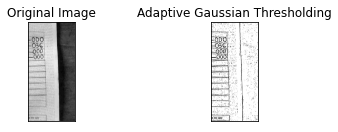

In [91]:
from matplotlib import pyplot as plt
img = cv2.imread(out_file,0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Adaptive Gaussian Thresholding']
images = [img, th3]
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()